<a href="https://colab.research.google.com/github/asepmuhidin/kriptografi/blob/main/Steganografi_muhidin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steganografi Model LSB
### Created by Asep Muhidin, Universitas Pelita Bangsa, 8-12-2021 

In [ ]:
#Install PIL
!pip install PIL

In [ ]:
#Upload image
from google.colab import files
files.upload()

Saving Logo Universitas Pelita Bangsa.png to Logo Universitas Pelita Bangsa.png


{'Logo Universitas Pelita Bangsa.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01,\x08\x06\x00\x00\x00\xed\xb7\xe5\xc2\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00_zTXtRaw profile type APP1\x00\x00\x08\x99\xe3JO\xcdK-\xcaLV((\xcaO\xcb\xccI\xe5R\x00\x03c\x13.\x13K\x13K\xa3D\x03\x03\x03\x0b\x03\x0804006\x04\x92F@\xb69T(\xd1\x00\x05\x98\x98\x9b\xa5\x01\xa1\xb9Y\xb2\x99)\x88\xcf\x05\x00O\xba\x15h\x1b-\xd8\x8c\x00\x00 \x00IDATx\x9c\xec\x9dg\x98\x14\xc5\xd6\x80\xdf\xeaI;\x9b\xd8\x04\xcb\x923\x92\xb3JR\x92 \x98@\x14\tb"y\x81+*&\xb8*A\x11Q\xc4,\xc1\x0c(\x98A\x01E\xa2\n*H\x90\x9c\x17\x96\xbc\xb09M\xea\xee\xf3\xfd\xe8!)a\xf1\x1a\xef\xd7\xef\xf3\xcc\xb3;3U\xa7N\xd5\xcc\xd4\xa9\xaas\xaa\nllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllllll\xfe\xd7Q\x7f\xb5\x0266\x7f6"\xd2\x1a\x02\x11`j`\xb8@9\xc0\xe1\x00\xc3\x01N7\x10\x01\x18\xa0\x17\x02\xc7\xe0\xbd\x9f\x94\x1aT\xf4k9FO\xf0\x05@\xf3A\xb0\x00$\x1bT!8\n\x94\x8a\xc9\xf8\xd3+fc\xf3\

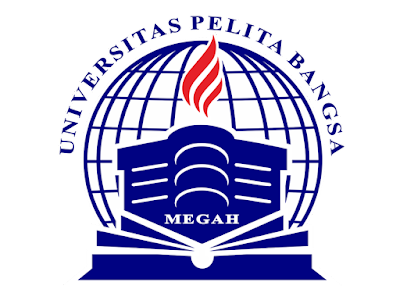

In [ ]:
#Show Image
from PIL import Image
logo=Image.open("Logo Universitas Pelita Bangsa.png")

logo

In [ ]:
#Get image information (size,format,mode)
print(f"Size={logo.size}, format={logo.format}, mode={logo.mode}")

Size=(400, 300), format=PNG, mode=RGBA


In [ ]:
#Get Image pixels
pixOfLogo=logo.load()
x,y=0,0
pixOfLogo[x,y]

(0, 0, 0, 0)

In [ ]:
#How to image pixel access
for x in range(logo.size[0]):
  for y in range(logo.size[1]):
    if x > 200 and pixOfLogo[x,y]==(0,0,0,0):
      pixOfLogo[x,y]=(34,139,34,255)

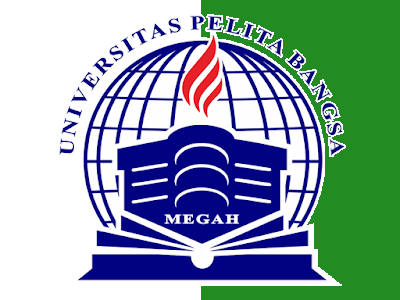

In [ ]:
#Show image after image pixel changed
logo

In [ ]:
#Store image pixel to numpy array
import numpy as np
arrOfLogo=np.array(Image.open("Logo Universitas Pelita Bangsa.png"))

In [ ]:
#Get image array numpy size information (shape)  
arrOfLogo.shape

(300, 400, 4)

In [ ]:
#Reshape array to one dimension
arrOfLogo_1d=arrOfLogo.reshape(-1)
arrOfLogo_1d.shape

(480000,)

In [ ]:
#Little bit about of string function
chr='a'
print(f"Ascii code for '{chr}' : {ord(chr)}")
print(f"Binery of  '{ord(chr)}' : {format(ord(chr),'b')}")
msg="aku pusing"
msg.replace(' ','')

Ascii code for 'a' : 97
Binery of  '97' : 1100001


'akupusing'

In [ ]:
#Initilization plain text to biner
plainText="Kampus keren"
plainTextBin=''.join(format(ord(chr),'b') for chr in plainText.replace(' ',''))
plainTextBin

'10010111100001110110111100001110101111001111010111100101111001011001011101110'

In [ ]:
#Little bit about binery function
#filter numpy array return value 
arrOfLogo_1d[arrOfLogo_1d>100]

#filter numpy array return index
np.where(arrOfLogo_1d==100)

(array([ 26384,  26385,  28008,  29640,  44031,  50557,  63436,  63437,
         69387,  69845,  76278,  88981, 112900, 117424, 117796, 128912,
        128913, 130208, 130209, 132372, 133135, 140455, 141500, 141501,
        146508, 146509, 151324, 152332, 152333, 157440, 157441, 157508,
        159272, 159402, 159484, 176798, 180256, 185348, 185349, 188502,
        189724, 189725, 195451, 205417, 232864, 232865, 237035, 241220,
        262072, 262073, 266172, 266173, 267941, 275932, 275933, 278099,
        285712, 285713, 287096, 287097, 302073, 309143, 314589, 318760,
        318761, 343572, 343573, 346784, 346785, 357793, 367336, 367337,
        373241, 374857, 391292, 391293, 396280, 396281, 410845, 435548,
        435549]),)

In [ ]:
ex=arrOfLogo_1d[26384]
pix1=format(ex,'b')
print(pix1,type(pix1))


1100100 <class 'str'>


In [ ]:
#replace LSB with bit data 
data='1'
newPixel=pix1[:-1]+data

#convert to desimal
int(newPixel,2)

101

In [ ]:
def changeLSB(pix,dataBin):
  int2bin=format(pix,'b')
  return int(int2bin[:-1]+dataBin,2)

In [ ]:
changeLSB(arrOfLogo_1d[26384],'1')

101

In [ ]:
#change LSB with each bit on binary plain text  
for idx,data in enumerate(plainTextBin) :
  arrOfLogo_1d[idx]=changeLSB(arrOfLogo_1d[idx],data)

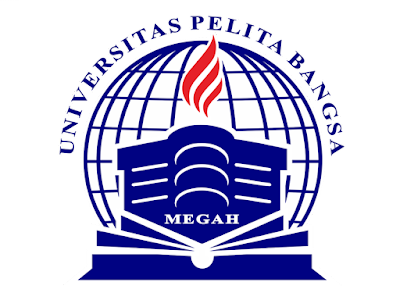

In [ ]:
#Show Stenoimage 
#Reshape to3d 
arrOfLogo_3d=arrOfLogo_1d.reshape(300, 400, 4)
Image.fromarray(arrOfLogo_3d) 